In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
from scipy import integrate

1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

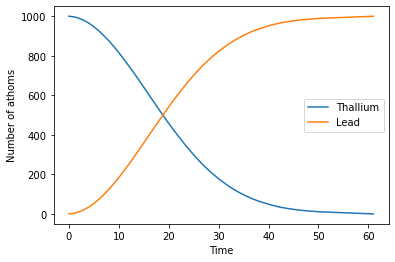

In [2]:
def p_t(t, tao = 3.052*60):
    return 1 - 2**-(t/tao)
     

Thallium = 1000
Lead = 0
T = []
L = []
T.append(Thallium)
L.append(Lead)
i = 1

while Thallium > 0: #Go ahed until the Thallium atoms go to zero
    decade = int(Thallium*p_t(i)) #Decide the percentuage of atoms that decade with p(t) random probabily distribution. 
    if decade==0: decade=1 #Set to 1 when the cast int() det it to zero, it's just to avoid infinity loop.
    Thallium = Thallium - decade
    Lead = Lead + decade #Increase the Lead atoms
    T.append(Thallium)
    L.append(Lead)
    i += 1
    
    
#Plot the results
x = np.arange(0,i)
plt.plot(x,T, label = "Thallium")
plt.plot(x,L, label = "Lead")
plt.xlabel("Time")
plt.ylabel("Number of athoms")
plt.legend()

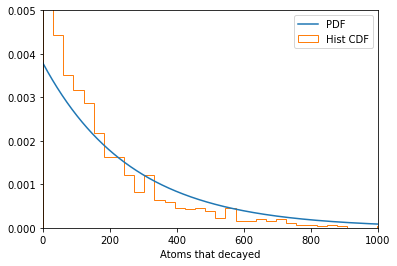

In [3]:
def p_pdf(t, tao = 3.052*60):
    #PDF of exponential distribution.
    return 2**(-(t/tao))*(np.log(2)/tao)

def p_cdf(t, tao = 3.052*60):
    #CDF of exponetial distribution.
    return 1 - 2**(-t*tao)

def p_icdf(y, tao = 3.052*60):
    #Inverse CDF of exponential distribution - i.e. quantile function.
    return -np.log(1 - y)*tao


x = np.random.random(1000)
v = p_icdf(x) # apply the inverse of the CDF

pdf = p_pdf(np.arange(0,1000))

plt.plot(np.arange(0,1000), pdf, label="PDF")
h, bins, _ = plt.hist(v, histtype = 'step', bins=50, density=True, label="Hist CDF")
plt.axis([0, 1000, 0, 0.005])
plt.xlabel("Atoms that decayed")
plt.legend()

2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

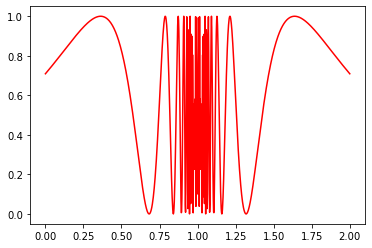

In [4]:
def f(x):
    return np.sin(1/(1-x))**2

def hit_miss():
    # Monte Carlo integration
    N = 1000
    
    count = 0
    for i in range(N):
        x = 2 * np.random.random() 
        y = np.random.random()     
        if y < f(x): count += 1
    I = 2 * count / N
    return I

def mean_value(r_i):
    V = 2
    N = 1000
    sum = 0
    for i in r_i:
        sum += f(i)
    
    I = V/N * sum
    return I

def results(I):
    I = np.array(I)
    I_mean = I.mean()
    err = I.std()
    
    return I_mean, err
    
    
x=np.linspace(0.001, 1.999, 1000)
plt.plot(x, f(x), 'r-')
integrals_hit = []

for i in range(100):
    I = hit_miss()
    integrals_hit.append(I)

In [5]:
I_hit, err_hit = results(integrals_hit)

print("The results of the integrals with the hit/miss method is:\n %.3f with err. +- %.3f" % (I_hit, err_hit))

The results of the integrals with the hit/miss method is:
 1.350 with err. +- 0.030


In [6]:
integrals_mean = []

for i in range(100):
    r_i = np.random.uniform(0,2,1000)
    I = mean_value(r_i)
    integrals_mean.append(I)
    
I_mean, err_mean = results(integrals_mean)
    
print("The results of the integrals with the mean/value method is:\n %.3f with err. +- %.3f" % (I_mean, err_mean))
print("\nThe mean/value method is a little more accurated than the hit/miss method.")

The results of the integrals with the mean/value method is:
 1.347 with err. +- 0.019

The mean/value method is a little more accurated than the hit/miss method.


3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [7]:
def sphere(x):
    x = x**2
    sum = x.sum()
    if sum <= 1:
        return 1
    else:
        return 0
    

def hit_miss_ndim(ndim):
    
    N = 1000
    count = 0
    for i in range(N):
        x = 2 * np.random.random(size=ndim) -1
        if sphere(x) == 1: count += 1
    
    I = 2 ** ndim * count / N
    
    return I
    

area_hit = []
area_10dim = []
N = 1000

for i in range(N):
    I_hit = hit_miss_ndim(2)
    I_10dim = hit_miss_ndim(10)
    area_hit.append(I_hit)
    area_10dim.append(I_10dim)
    
A_hit, err_hit = results(area_hit)
S_sphere, err_S = results(area_10dim)

print("The results with ndim = 2 using the hit/miss algorithm is: \n %.3f with err.: +/- %.3f (The real value is pi.)" %(A_hit,err_hit))
print("\nThe results with ndim = 10 using the same algotrithm is: \n %.3f with err.: +/- %.3f (The real value is 2.5047)" %(S_sphere,err_S))


print("\nWe notice that for a high dimensional problem the error increase.")

The results with ndim = 2 using the hit/miss algorithm is: 
 3.142 with err.: +/- 0.054 (The real value is pi.)

The results with ndim = 10 using the same algotrithm is: 
 2.636 with err.: +/- 1.615 (The real value is 2.5047)

We notice that for a high dimensional problem the error increase.


4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

In [8]:
from math import e

def w(x):
    return 1/(x**0.5)

def f(x):
    return (x**(-0.5)/(e**x + 1))

def mean_value(): #I will use it to calculate the integral of w(x)
    V = 1
    N = 100
    points = 1000
    I = []
    for j in range(N):
        sum = 0
        r_i = np.random.uniform(0,1,points)
        for i in r_i:
            sum += w(i)
    
        I.append(V/points * sum)
    
    I_w, _ = results(I)
    
    return I_w

def sampling_integration(N):
    x = np.random.uniform(0,1,N)
    sum = np.sum(f(x)/w(x))
    I_w = mean_value()
    I = sum * I_w * (1/N)
    return I
        
        
I = sampling_integration(100000)

print("The results is: %.3f" %I)
print("The result is not perfect but it is close to the real one.")

The results is: 0.756
The result is not perfect but it is close to the real one.
